In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [29]:
# Load the CSV file into a DataFrame with tab as a delimiter
df = pd.read_csv('scores_keyword_sphinx.csv')

# Display the first few rows to ensure it's loaded correctly
df.head()


,Query ID,Query Text,Answer Chapter,Note,Result 1,Score 1,Result 2,Score 2,Result 3,Score 3,...,Result 6,Score 6,Result 7,Score 7,Result 8,Score 8,Result 9,Score 9,Result 10,Score 10
0,1,pointer,6.2,12.2 pointer to data structure was not returne...,10.1,1,12.2,2,13.3,1,...,6.2,3.0,6.3,2.0,7.2,1.0,NaN,2.0,NaN,1.0
1,2,Elon Musk,chapter 7.1. and 9,only two results,7.1,3,9,3,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,email,Priciple… or Snefru…,,Principle of,3,Snefru: Learning Programming with C,3,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,fig. 2.1,2.1,no result,11.2,0,9.3,0,1.3,0,...,11.3,0.0,13.1,0.0,3.2,2.0,6.2,0.0,6.3,0.0
4,5,empty linked list,13.3 or 13.4,NaN,13.3,3,13.4,3,13.5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Function to calculate Precision@k
def precision_at_k(scores, k=5):
    # Convert scores to a NumPy array and replace NaN with 0
    scores = np.asarray(scores)[:k]
    scores = np.nan_to_num(scores, nan=0)  # Replace N/A (nan) with 0
    relevant_scores = scores[(scores == 2) | (scores == 3)]
    return len(relevant_scores) / k

# Function to calculate DCG@k
def dcg_at_k(scores, k=5):
    # Convert scores to a NumPy array and replace NaN with 0
    scores = np.asfarray(scores)[:k]
    scores = np.nan_to_num(scores, nan=0)  # Replace N/A (nan) with 0
    if scores.size:
        return np.sum(scores / np.log2(np.arange(2, scores.size + 2)))
    return 0.0

# Function to calculate NDCG@k
def ndcg_at_k(scores, k=5):
    # Convert scores to a NumPy array and replace NaN with 0
    scores = np.nan_to_num(scores, nan=0)  # Replace N/A (nan) with 0
    dcg_max = dcg_at_k(sorted(scores, reverse=True), k)
    if not dcg_max:
        return 0.0
    return dcg_at_k(scores, k) / dcg_max

# Function to calculate MRR (considering all ranks)
def mean_reciprocal_rank(scores):
    # Convert scores to a NumPy array and replace NaN with 0
    scores = np.asarray(scores)
    scores = np.nan_to_num(scores, nan=0)  # Replace N/A (nan) with 0
    for i, score in enumerate(scores, start=1):
        if score == 3:
            return 1 / i
    return 0


In [31]:
# Initialize lists to store results
precision_scores = []
mrr_scores = []
dcg_scores = []
ndcg_scores = []

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    # Extract relevance scores for the current query (considering top 5 for Precision, DCG, NDCG)
    # Directly extract scores by filtering column names that contain 'Score'
    all_scores = [row[col] for col in df.columns if 'Score' in col]

    top_5_scores = all_scores[:5]
    
    # Calculate metrics
    precision = precision_at_k(top_5_scores, k=5)
    mrr = mean_reciprocal_rank(all_scores)  # Consider all ranks for MRR
    dcg = dcg_at_k(top_5_scores, k=5)
    ndcg = ndcg_at_k(top_5_scores, k=5)
    
    # Append to the lists
    precision_scores.append(precision)
    mrr_scores.append(mrr)
    dcg_scores.append(dcg)
    ndcg_scores.append(ndcg)

# Add the metrics as new columns in the DataFrame
df['Precision@5'] = precision_scores
df['MRR'] = mrr_scores
df['DCG@5'] = dcg_scores
df['NDCG@5'] = ndcg_scores

# Display the DataFrame with the new columns
df.head()


,Query ID,Query Text,Answer Chapter,Note,Result 1,Score 1,Result 2,Score 2,Result 3,Score 3,...,Result 8,Score 8,Result 9,Score 9,Result 10,Score 10,Precision@5,MRR,DCG@5,NDCG@5
0,1,pointer,6.2,12.2 pointer to data structure was not returne...,10.1,1,12.2,2,13.3,1,...,7.2,1.0,NaN,2.0,NaN,1.0,0.6,0.166667,4.396918,0.865639
1,2,Elon Musk,chapter 7.1. and 9,only two results,7.1,3,9,3,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1.000000,4.892789,1.000000
2,3,email,Priciple… or Snefru…,,Principle of,3,Snefru: Learning Programming with C,3,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1.000000,4.892789,1.000000
3,4,fig. 2.1,2.1,no result,11.2,0,9.3,0,1.3,0,...,3.2,2.0,6.2,0.0,6.3,0.0,0.0,0.000000,0.000000,0.000000
4,5,empty linked list,13.3 or 13.4,NaN,13.3,3,13.4,3,13.5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6,1.000000,5.892789,1.000000


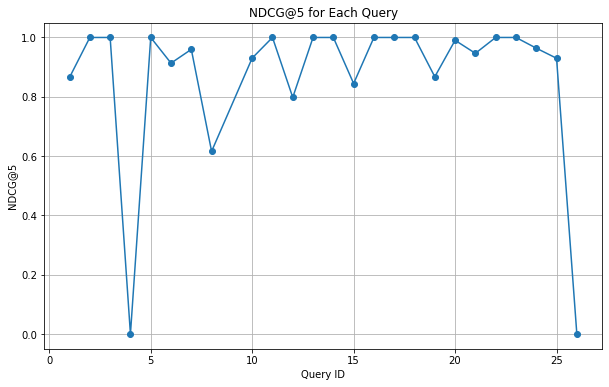

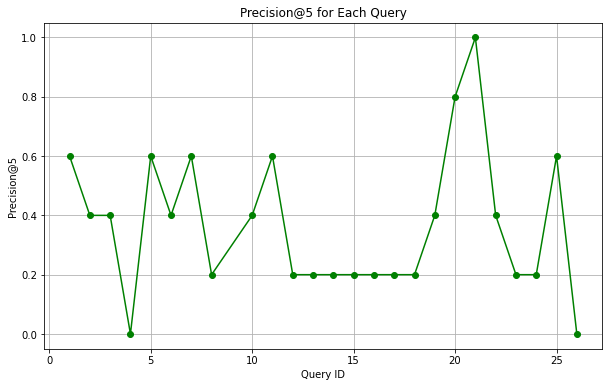

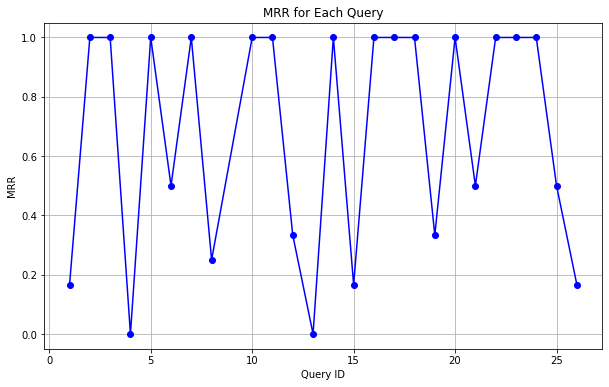

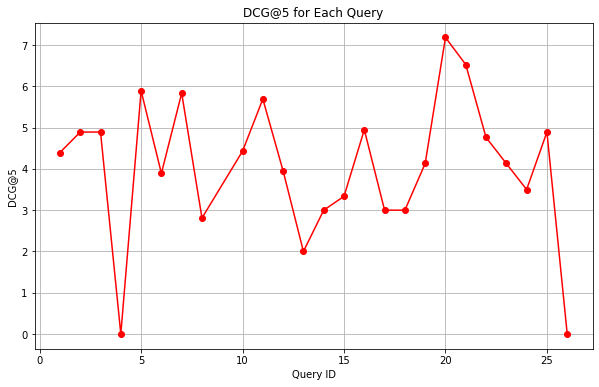

In [32]:
# Plot NDCG@5 scores
plt.figure(figsize=(10, 6))
plt.plot(df['Query ID'], df['NDCG@5'], marker='o')
plt.title('NDCG@5 for Each Query')
plt.xlabel('Query ID')
plt.ylabel('NDCG@5')
plt.grid(True)
plt.show()

# Plot Precision@5 scores
plt.figure(figsize=(10, 6))
plt.plot(df['Query ID'], df['Precision@5'], marker='o', color='green')
plt.title('Precision@5 for Each Query')
plt.xlabel('Query ID')
plt.ylabel('Precision@5')
plt.grid(True)
plt.show()

# Plot MRR scores
plt.figure(figsize=(10, 6))
plt.plot(df['Query ID'], df['MRR'], marker='o', color='blue')
plt.title('MRR for Each Query')
plt.xlabel('Query ID')
plt.ylabel('MRR')
plt.grid(True)
plt.show()

# Plot DCG@5 scores
plt.figure(figsize=(10, 6))
plt.plot(df['Query ID'], df['DCG@5'], marker='o', color='red')
plt.title('DCG@5 for Each Query')
plt.xlabel('Query ID')
plt.ylabel('DCG@5')
plt.grid(True)
plt.show()


In [33]:
# Calculate the average of each metric
avg_precision = df['Precision@5'].mean()
avg_mrr = df['MRR'].mean()
avg_dcg = df['DCG@5'].mean()
avg_ndcg = df['NDCG@5'].mean()

# Create a DataFrame with the average values
average_metrics = pd.DataFrame({
    'Query ID': ['Average'],
    'Query Text': ['N/A'],  # Adjust based on your DataFrame columns
    'Precision@5': [avg_precision],
    'MRR': [avg_mrr],
    'DCG@5': [avg_dcg],
    'NDCG@5': [avg_ndcg]
})

# Append the average metrics as a new row to the DataFrame using pd.concat()
df = pd.concat([df, average_metrics], ignore_index=True)

# Display the DataFrame with the new averages row
df.tail()


,Query ID,Query Text,Answer Chapter,Note,Result 1,Score 1,Result 2,Score 2,Result 3,Score 3,...,Result 8,Score 8,Result 9,Score 9,Result 10,Score 10,Precision@5,MRR,DCG@5,NDCG@5
21,23,dynamically allocation for data structure,", chapter 12.2",this is a case where keyword search returned s...,12.2,3.0,13.2,1.0,13.3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.200,1.000000,4.130930,1.000000
22,24,passing head by value,13.3,NaN,13.3,3.0,12.3,0.0,13.4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.200,1.000000,3.500000,0.963940
23,25,selction sort,14.2,NaN,14,2.0,14.2,3.0,14.4,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.600,0.500000,4.892789,0.929859
24,26,set up vs code,Set Up Visual Studio Code,NaN,2.4,0.0,3.1,0.0,3.2,0.0,...,10.5,0.0,NaN,NaN,NaN,NaN,0.000,0.166667,0.000000,0.000000
25,Average,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.368,0.676667,4.043913,0.865047


In [34]:
# Save the updated DataFrame to a CSV file
df.to_csv('results_keyword_sphinx-search.csv', index=False)

# Confirmation message
print("Updated DataFrame with averages saved to 'results_keyword_sphinx-search.csv'.")


Updated DataFrame with averages saved to 'results_keyword_sphinx-search.csv'.
